# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [118]:
df = pd.read_csv(r"Profissao- Cientista de Dados_M10_support material.csv")
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [119]:
df_ = df.loc[:, ["posse_de_imovel", "posse_de_veiculo", "renda"]]
df_

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37
...,...,...,...
14995,True,True,1193.29
14996,True,True,2519.18
14997,True,True,1586.85
14998,True,False,6975.39


,posse_de_imovel,posse_de_veiculo,renda
posse_de_imovel,1.000000,-0.014727,0.029827
posse_de_veiculo,-0.014727,1.000000,0.063414
renda,0.029827,0.063414,1.000000


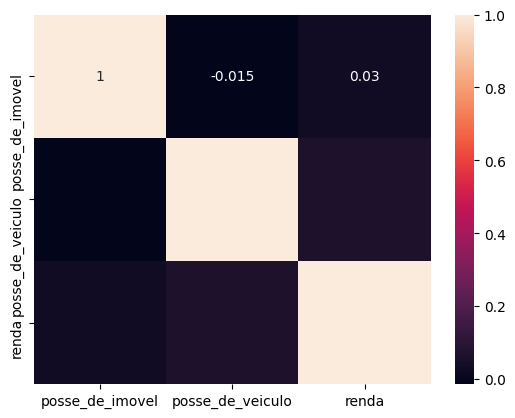

In [120]:
# Cria matriz de correlação

matriz_correlacao = df_.corr()


# Mostra matriz de correlação como mapa de calor
sns.heatmap(matriz_correlacao, annot=True)
df_.corr()

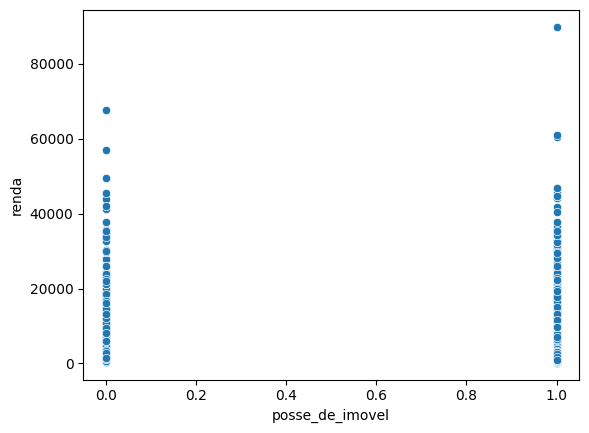

In [121]:
 scatterplot = sns.scatterplot(x = "posse_de_imovel", y = "renda", data = df_)

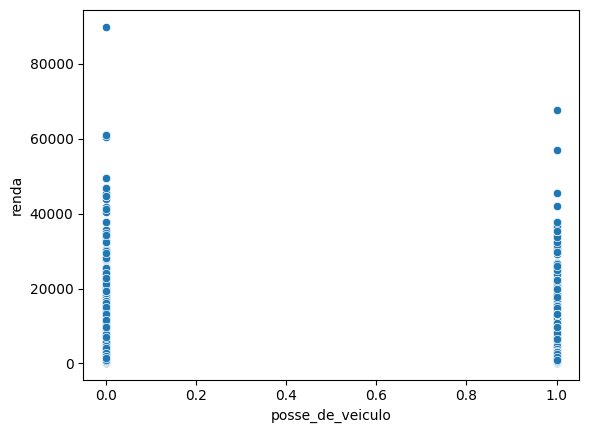

In [122]:
 scatterplot = sns.scatterplot(x = "posse_de_veiculo", y = "renda", data = df_)

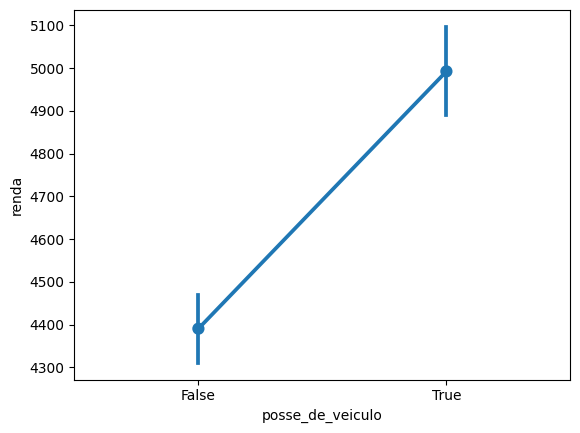

In [123]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=df_, dodge=True, ci = 90)

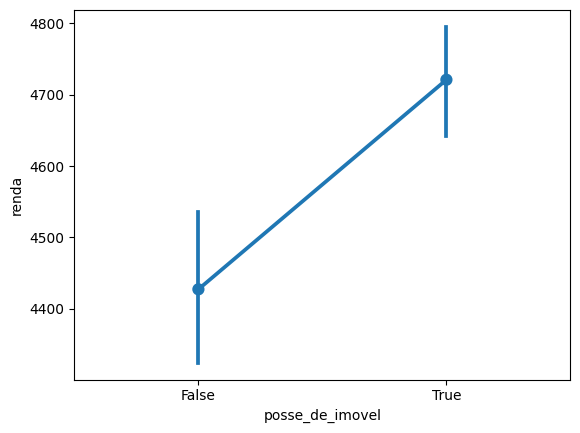

In [124]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=df_, dodge=True, ci = 90)

**Categorizar a variável Target**

In [148]:
df_["renda"].describe()

count    14999.000000
mean      4624.930615
std       4628.582450
min        187.690000
25%       1946.285000
50%       3278.260000
75%       5642.420000
max      89918.040000
Name: renda, dtype: float64

In [162]:
df_["Renda_categorizada"] = pd.cut(df_['renda'], bins=[159.9, 3278.260000, 89918.040000], labels=['Baixa', 'Alta'])
df_ = df_.dropna()
df_

,posse_de_imovel,posse_de_veiculo,renda,Renda_categorizada
0,True,False,3369.24,Alta
1,True,True,6096.14,Alta
2,True,True,5658.98,Alta
3,False,True,7246.69,Alta
4,False,False,4017.37,Alta
...,...,...,...,...
14995,True,True,1193.29,Baixa
14996,True,True,2519.18,Baixa
14997,True,True,1586.85,Baixa
14998,True,False,6975.39,Alta


**Criar Dummies**

In [163]:
df_dummies = pd.get_dummies(df_, columns=['posse_de_imovel', 'posse_de_veiculo'])
df_dummies.replace({True: 1, False: 0}, inplace=True)
df_dummies.replace({"Renda_categorizada": {"Alta": 1, "Baixa": 0}}, inplace=True)
df_dummies.drop("renda", axis = 1, inplace=True)

df_dummies

,Renda_categorizada,posse_de_imovel_False,posse_de_imovel_True,posse_de_veiculo_False,posse_de_veiculo_True
0,1,0,1,1,0
1,1,0,1,0,1
2,1,0,1,0,1
3,1,1,0,0,1
4,1,1,0,1,0
...,...,...,...,...,...
14995,0,0,1,0,1
14996,0,0,1,0,1
14997,0,0,1,0,1
14998,1,0,1,1,0


**Separar em variável Target e explicativas**

In [164]:
y = df_.Renda_categorizada
y

0         Alta
1         Alta
2         Alta
3         Alta
4         Alta
         ...  
14995    Baixa
14996    Baixa
14997    Baixa
14998     Alta
14999    Baixa
Name: Renda_categorizada, Length: 14999, dtype: category
Categories (2, object): ['Baixa' < 'Alta']

In [165]:
x = df_dummies.drop("Renda_categorizada", axis = 1)
x

,posse_de_imovel_False,posse_de_imovel_True,posse_de_veiculo_False,posse_de_veiculo_True
0,0,1,1,0
1,0,1,0,1
2,0,1,0,1
3,1,0,0,1
4,1,0,1,0
...,...,...,...,...
14995,0,1,0,1
14996,0,1,0,1
14997,0,1,0,1
14998,0,1,1,0


In [166]:
df_.to_excel(r"dfd.xlsx")

In [172]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [173]:
clf = clf.fit(x, y)
clf

DecisionTreeClassifier()

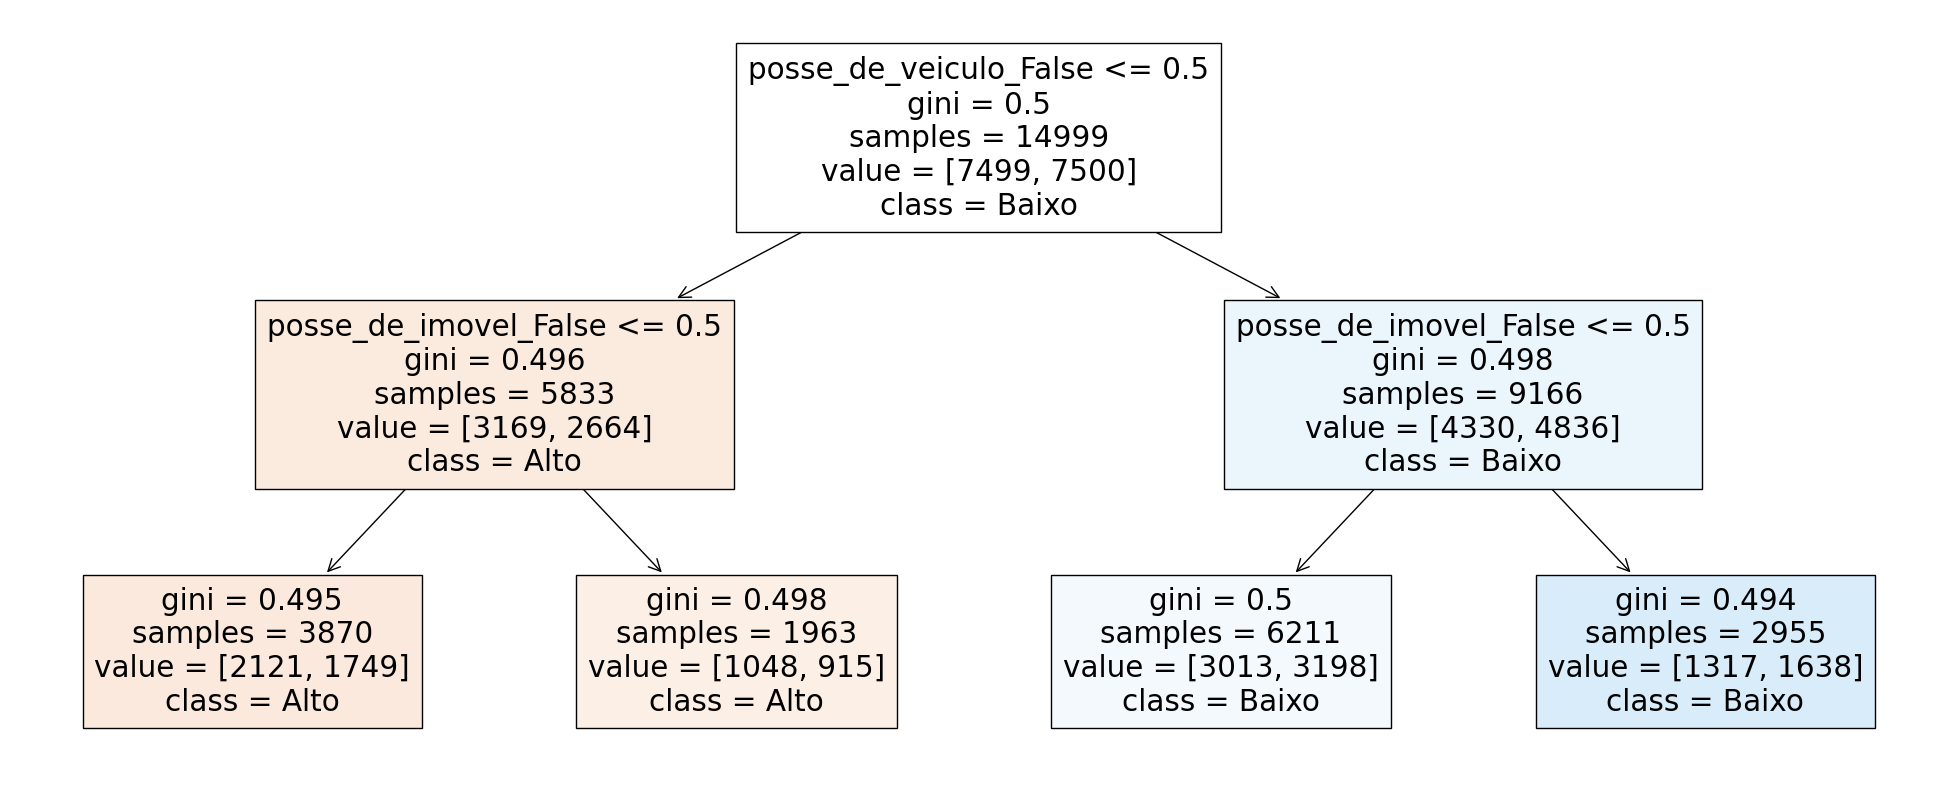

In [174]:
plt.figure(figsize = (25 ,10))
plot_tree(clf,
          filled = True,
          class_names = ['Alto', 'Baixo'],
          feature_names = x.columns);

C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


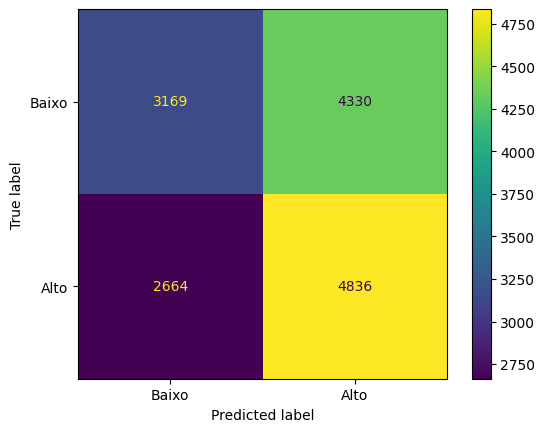

In [175]:
plot_confusion_matrix(clf, x, y, display_labels=['Baixo', 'Alto']);

In [176]:
predict = clf.predict(x)


In [177]:
accuracy_score(y, predict)

0.5337022468164544

**Dividir o dataset em treino e teste**

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [180]:
clf = clf.fit(x_train, y_train)

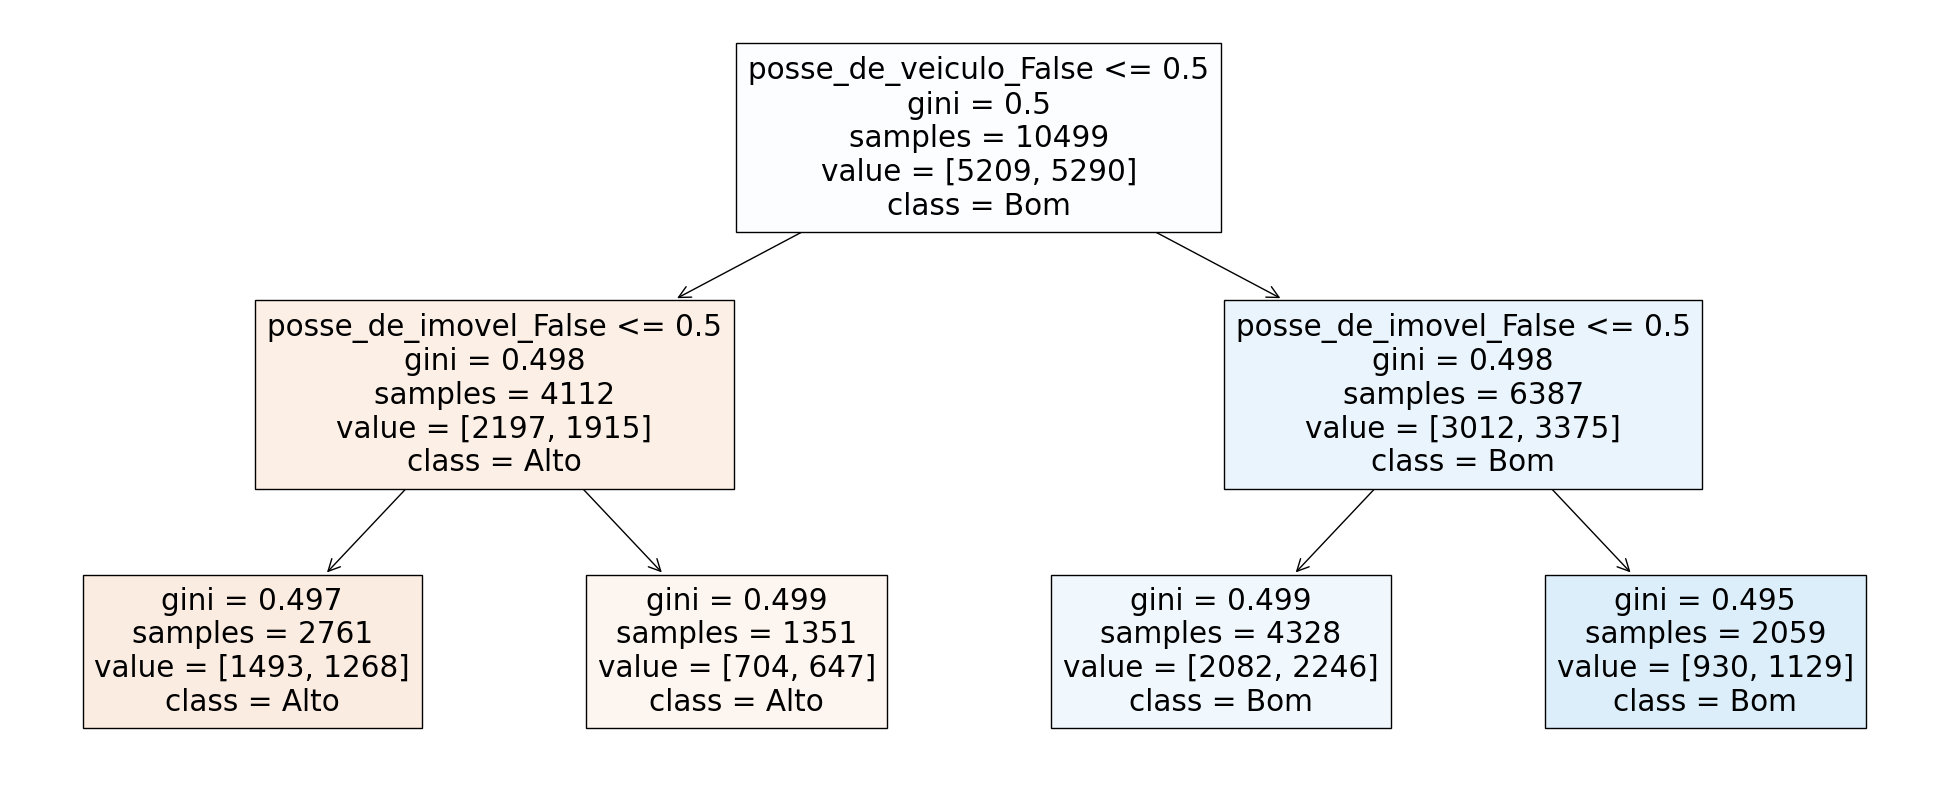

In [181]:
plt.figure(figsize = (25 ,10))
plot_tree(clf,
          filled = True,
          class_names = ['Alto', 'Bom'],
          feature_names = x_train.columns);


C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


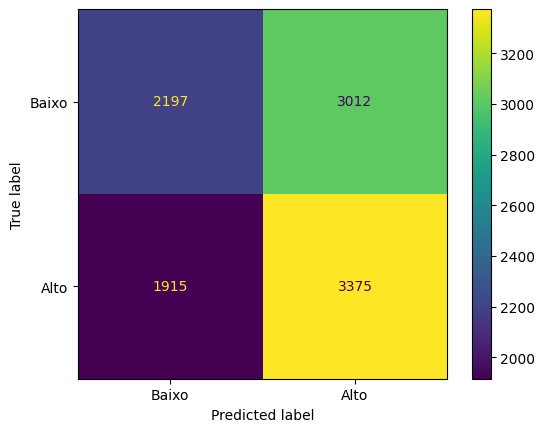

In [182]:
plot_confusion_matrix(clf, x_train, y_train, display_labels=['Baixo', 'Alto']);

In [183]:
predict_train = clf.predict(x_train)

In [184]:
accuracy_score(y_train, predict_train)

0.5307172111629679

**Vamos avaliar o modelo na base de testes**

In [187]:
clf = clf.fit(x_test, y_test)

C:\Users\ncali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


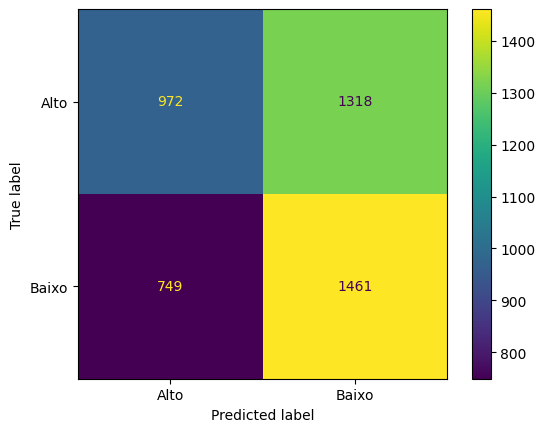

In [188]:
plot_confusion_matrix(clf, x_test, y_test, display_labels = ["Alto", "Baixo"])

In [189]:
y_chapeu_teste = clf.predict(x_test)
y_chapeu_teste

array(['Alta', 'Baixa', 'Alta', ..., 'Baixa', 'Alta', 'Alta'],
      dtype=object)

In [190]:
y_chapeu_teste = clf.predict(x_test)

In [192]:
accuracy_score(y_test, y_chapeu_teste) #Acurácia da base de teste

0.5406666666666666